<a href="https://colab.research.google.com/github/Cado87/Hugging-Face-Computer-Vision-Course/blob/main/Feature_matching_SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

In [2]:
!wget https://github.com/opencv/opencv/raw/4.x/samples/data/box.png -O image1.jpg
!wget https://github.com/opencv/opencv/raw/4.x/samples/data/box_in_scene.png -O image2.jpg

--2025-11-10 09:40:59--  https://github.com/opencv/opencv/raw/4.x/samples/data/box.png
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/4.x/samples/data/box.png [following]
--2025-11-10 09:40:59--  https://raw.githubusercontent.com/opencv/opencv/4.x/samples/data/box.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50728 (50K) [image/png]
Saving to: ‘image1.jpg’

image1.jpg          100%[===================>]  49.54K  --.-KB/s    in 0.01s   

2025-11-10 09:40:59 (4.19 MB/s) - ‘image1.jpg’ saved [50728/50728]

--2025-11-10 09:40:59--  https://github.com/opencv/opencv/raw/4.x/sample

In [3]:
# Load the images
img1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded successfully
if img1 is None:
    print("Error: image1.jpg not found or could not be loaded.")
if img2 is None:
    print("Error: image2.jpg not found or could not be loaded.")

# Ensure images are loaded before proceeding
if img1 is not None and img2 is not None:
    # Continue with feature matching
    pass
else:
    # Handle the case where images are not loaded
    raise FileNotFoundError("One or both images could not be loaded.")

In [4]:
# Create SIFT object
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

array([[[ 21,  21,  21],
        [ 18,  18,  18],
        [ 25,  25,  25],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [129, 129, 129]],

       [[ 22,  22,  22],
        [ 20,  20,  20],
        [ 18,  18,  18],
        ...,
        [127, 127, 127],
        [127, 127, 127],
        [128, 128, 128]],

       [[ 18,  18,  18],
        [ 20,  20,  20],
        [ 12,  12,  12],
        ...,
        [128, 128, 128],
        [128, 128, 128],
        [128, 128, 128]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 57,  57,  57],
        [ 55,  55,  55],
        [ 49,  49,  49]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 63,  63,  63],
        [ 61,  61,  61],
        [ 54,  54,  54]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 50,  50,  50],
        [ 51,  51,  51],
        [ 59,  59,  59]]], dtype=uint8)
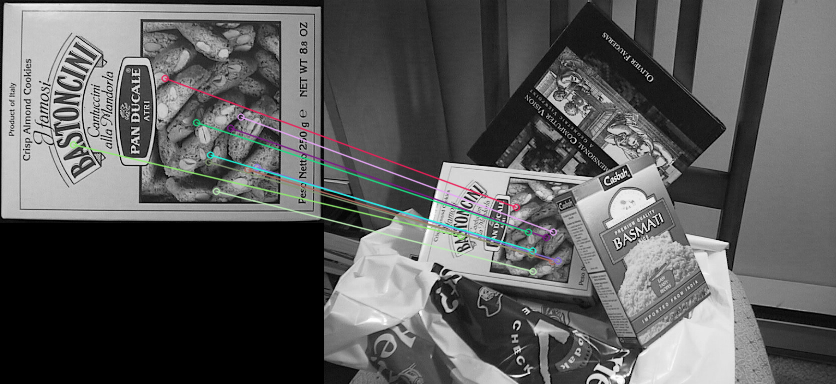

In [5]:
# Create a BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matches
display(img3)